<a href="https://colab.research.google.com/github/Ilhan-Krdnz/gazi_ai_egitim/blob/main/cifar10_dersi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli kütüphanelerin ve datasetin eklenmesi

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import cifar10

Datasetin yüklenmesi ve normalizasyonu

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Sequential metodu ile model mimarisi kurulumu

In [3]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, 3, padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

.compile ve .fit

In [4]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ['accuracy'],
)
history = model.fit(x_train, y_train, batch_size = 64, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/5
782/782 [==============================] - 67s 81ms/step - loss: 2.0024 - accuracy: 0.3234 - val_loss: 1.5043 - val_accuracy: 0.4537
Epoch 2/5
782/782 [==============================] - 61s 78ms/step - loss: 1.3801 - accuracy: 0.5054 - val_loss: 1.2612 - val_accuracy: 0.5514
Epoch 3/5
782/782 [==============================] - 59s 75ms/step - loss: 1.1673 - accuracy: 0.5863 - val_loss: 1.1260 - val_accuracy: 0.6065
Epoch 4/5
782/782 [==============================] - 59s 75ms/step - loss: 1.0256 - accuracy: 0.6415 - val_loss: 1.1120 - val_accuracy: 0.6129
Epoch 5/5
782/782 [==============================] - 60s 77ms/step - loss: 0.9161 - accuracy: 0.6794 - val_loss: 1.0249 - val_accuracy: 0.6437


.evaluate

In [5]:
#model.evaluate(x_test, y_test, batch_size = 32, verbose = 1)

history.history ve bunu verilere atama

In [13]:

egitim_dogrulugu = history.history['accuracy']
kayip = history.history['loss']
val_dogrulugu = history.history['accuracy']
val_kayip = history.history['loss']


[0.323419988155365,
 0.5054399967193604,
 0.5863199830055237,
 0.6414999961853027,
 0.6794000267982483]

matpolotlib doğruluk oranı çizdirme

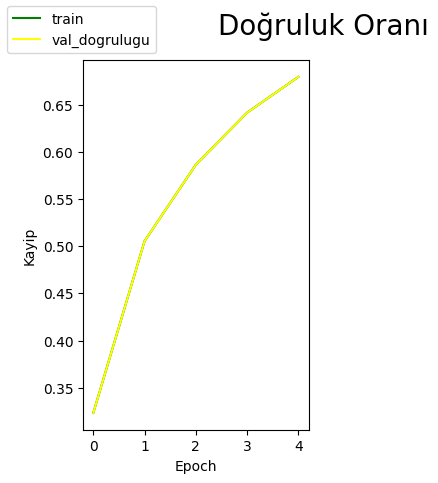

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(egitim_dogrulugu, color = 'green', label = 'train')
plt.plot(val_dogrulugu, color = 'yellow', label = 'val_dogrulugu')
plt.ylabel('Kayip')
plt.xlabel('Epoch')
fig.suptitle('Doğruluk Oranı', fontsize = 20)
fig.legend(loc='upper left')
plt.show()

matplotlib kayıp oranı çizdirme

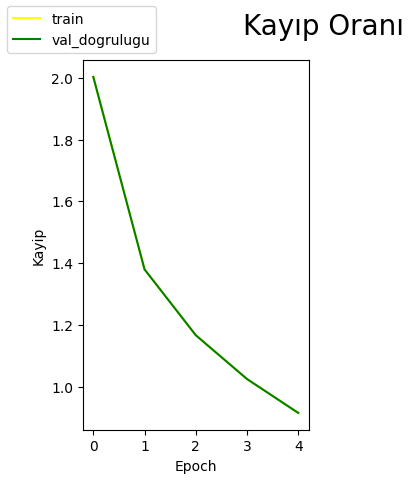

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(kayip, color = 'yellow', label = 'train')
plt.plot(val_kayip, color = 'green', label = 'val_dogrulugu')
plt.ylabel('Kayip')
plt.xlabel('Epoch')
fig.suptitle('Kayıp Oranı', fontsize = 20)
fig.legend(loc='upper left')
plt.show()

model.save()

In [28]:
model.save('cnn_modelim')

# State of art modelleri

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_classification_zoo.md

Resnet50

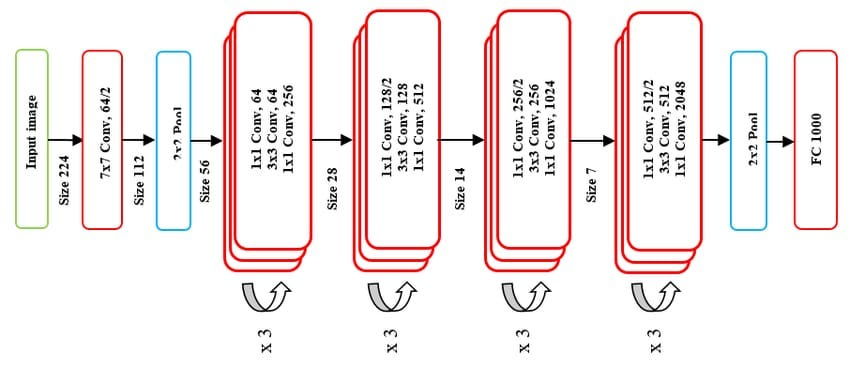

MobileNet

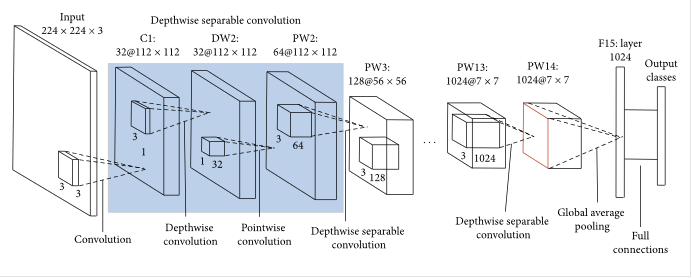